In [10]:
import sqlite3
from datetime import datetime
from Occupation import Occupation
import json 
from pprint import pprint
from matplotlib import pyplot as plt
from get_page_length_subset_indices import get_subset_indices
from plot_page_statistics import plot_page_stats
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from bin_revision_history import month_bin_revisions
from count_contributions import contributions_by_user
from statistics import median, mean, stdev
%matplotlib widget

plt.rcParams['figure.dpi'] = 180

In [2]:
def plot_page(occ):
    
    print("lenient links:")
    pprint(occ.lenient_links)
    
    print("\n")
    print("\n")
    
    print("strict links:")
    pprint(occ.strict_links)
    plot_page_stats(occ)


db_path = r"C:\Users\leond\Documents\Github\csh\data\data_bases\aggregated_edits.db"


# page_indices = [ i  for i in  get_subset_indices("test.json",5000)]


con = sqlite3.connect(db_path)
cur = con.cursor()
cur.execute(f"Select * from occupations Where id = 26")
occupations = cur.fetchall()

In [3]:
print(occupations[0][2])

Computer Programmers


# Checking out a specific profession



lenient links:
[['Programmer', 'http://en.wikipedia.org/?curid=23716'],
 ['Computer programming', 'http://en.wikipedia.org/?curid=5311']]




strict links:
[['Programmer', 'http://en.wikipedia.org/?curid=23716']]


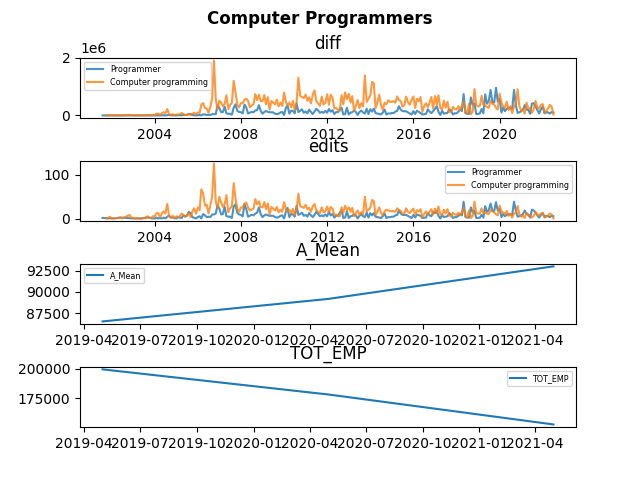

In [4]:
occ = Occupation(*occupations[0])
plot_page(occ)

In [14]:
Programmer = month_bin_revisions(occ.lenient_revisions)["Programmer"] #???

## Operations Management Spikes
We see 4 spikes with edit counts over 30
We can extract the months for these spikes easily with the following line: 

In [12]:
[(date, value) for date, value in occ.lenient_binned_edits["Programmer"].items() if value > 30]


[(datetime.datetime(2006, 12, 1, 0, 0), 31),
 (datetime.datetime(2007, 10, 1, 0, 0), 33),
 (datetime.datetime(2008, 3, 1, 0, 0), 34),
 (datetime.datetime(2018, 5, 1, 0, 0), 39),
 (datetime.datetime(2019, 8, 1, 0, 0), 35),
 (datetime.datetime(2019, 11, 1, 0, 0), 38),
 (datetime.datetime(2020, 9, 1, 0, 0), 39)]

In [13]:
edit_numbers = [value for value in occ.lenient_binned_edits["Programmer"].values()]
print(median(edit_numbers))
print(mean(edit_numbers))
print(stdev(edit_numbers))

7
9.168888888888889
7.689737543769845


### 2006-10 
user(s) with the IP 222.64.54.* make(s) 16 changes
user with the IP 65.59.219.179 makes 7 changes

Two users account for more than 50% of the changes



### 2013-03 
user Lbertolotti accounts for 34 of 42 changes 
he was also very active in 2013-02

In [16]:
contributions_by_user(Programmer[datetime(2007, 3, 1, 0, 0)])

[('Gwern', 2),
 ('121.97.128.13', 2),
 ('SciAndTech', 1),
 ('168.254.226.142', 1),
 ('121.112.129.216', 1),
 ('68.160.213.65', 1),
 ('KeithH', 1),
 ('207.144.99.91', 1),
 ('Hu12', 1)]

### 2014-03
user Lbertolotti and user Trackteur account for 13 and 23 changes respectively
36 out of 59


In [8]:
contributions_by_user(operations_management[datetime(2014, 3, 1, 0, 0)])

[('Trackteur', 23),
 ('Lbertolotti', 13),
 ('TheRedPenOfDoom', 5),
 ('Ukexpat', 4),
 ('Arjayay', 2),
 ('Chuluojun', 2),
 ('101.63.195.233', 2),
 ('Dn4595', 1),
 ('117.254.60.70', 1),
 ('BG19bot', 1),
 ('115.241.127.76', 1),
 ('Meters', 1),
 ('81.178.237.55', 1),
 ('Dewritech', 1),
 ('Fraggle81', 1)]

### 2014-06
Moorshed k and Lbertolotti responsible for 40 out of 49 edits

In [9]:
contributions_by_user(operations_management[datetime(2014, 6, 1, 0, 0)])

[('Moorshed k', 23),
 ('Lbertolotti', 17),
 ('Der-Wir-Ing', 2),
 ('SchreiberBike', 1),
 ('AnomieBOT', 1),
 ('BG19bot', 1),
 ('Mild Bill Hiccup', 1),
 ('Yobot', 1),
 ('TheRedPenOfDoom', 1),
 ('72.214.200.190', 1)]

## Qualitative Analysis
Almost exclusively the users with the top edits added new content to the page. Sometimes edits got reverted (eg.: Tracteur adding unecessary pictures in 2014-03), still most of these contributions got added in good will and extended the page.

Contributions by users that had less contributions in the months of the Spikes usually were reverts (of unnecessary or wrong information) and formatting/typo fixes


# Market Research Analysts and Marketing Specialists
Min page size now 20k


In [9]:
page_indices = [i  for i in  get_subset_indices("test.json",20000)]


con = sqlite3.connect(db_path)
cur = con.cursor()
cur.execute(f"Select * from occupations Where id IN {tuple(page_indices)}")
occupations = cur.fetchall()
occ = Occupation(*occupations[0])
plot_page(occ)

FileNotFoundError: [Errno 2] No such file or directory: 'test.json'

## Spikes in Financial analyst

In [11]:
spikes = [ (date, value) for date, value in occ.lenient_binned_edits["Financial analyst"].items() if value > 30]
binned_revisions = month_bin_revisions(occ.lenient_revisions)["Financial analyst"]
edit_numbers = [ value for value in occ.lenient_binned_edits["Financial analyst"].values()]
print(median(edit_numbers))
print(mean(edit_numbers))
print(stdev(edit_numbers))

3
5.904761904761905
9.571886155100783


In [12]:
for date, value in spikes:
    print(f"Spike at {date.year}-{date.month} with {value} edits")
    print("users ordered by contributions:")
    pprint(contributions_by_user(binned_revisions[date]))
    print("\n\n")
    


    

Spike at 2019-10 with 56 edits
users ordered by contributions:
[('41.180.16.10', 36), ('41.168.8.36', 19), ('BD2412', 1)]



Spike at 2020-6 with 85 edits
users ordered by contributions:
[('Fintor', 80), ('155.93.141.199', 3), ('Rodw', 1), ('Citation bot', 1)]



Spike at 2020-7 with 38 edits
users ordered by contributions:
[('Fintor', 22),
 ('102.132.165.144', 7),
 ('155.93.141.199', 5),
 ('Deepfriedokra', 1),
 ('Ira Leviton', 1),
 ('Tipranks', 1),
 ('DannyS712', 1)]





## Qualitative Exploration
We looked at financial analyst together and found the spikes where mostly just Fintor extending the page.
Also the spikes most probably do not correlate with any economical events.


lenient links:
[['Referee', 'http://en.wikipedia.org/?curid=400892'],
 ['Official (tennis)', 'http://en.wikipedia.org/?curid=14563356'],
 ['Official (basketball)', 'http://en.wikipedia.org/?curid=11230394']]




strict links:
[['Referee', 'http://en.wikipedia.org/?curid=400892'],
 ['Official (tennis)', 'http://en.wikipedia.org/?curid=14563356'],
 ['Official (basketball)', 'http://en.wikipedia.org/?curid=11230394']]


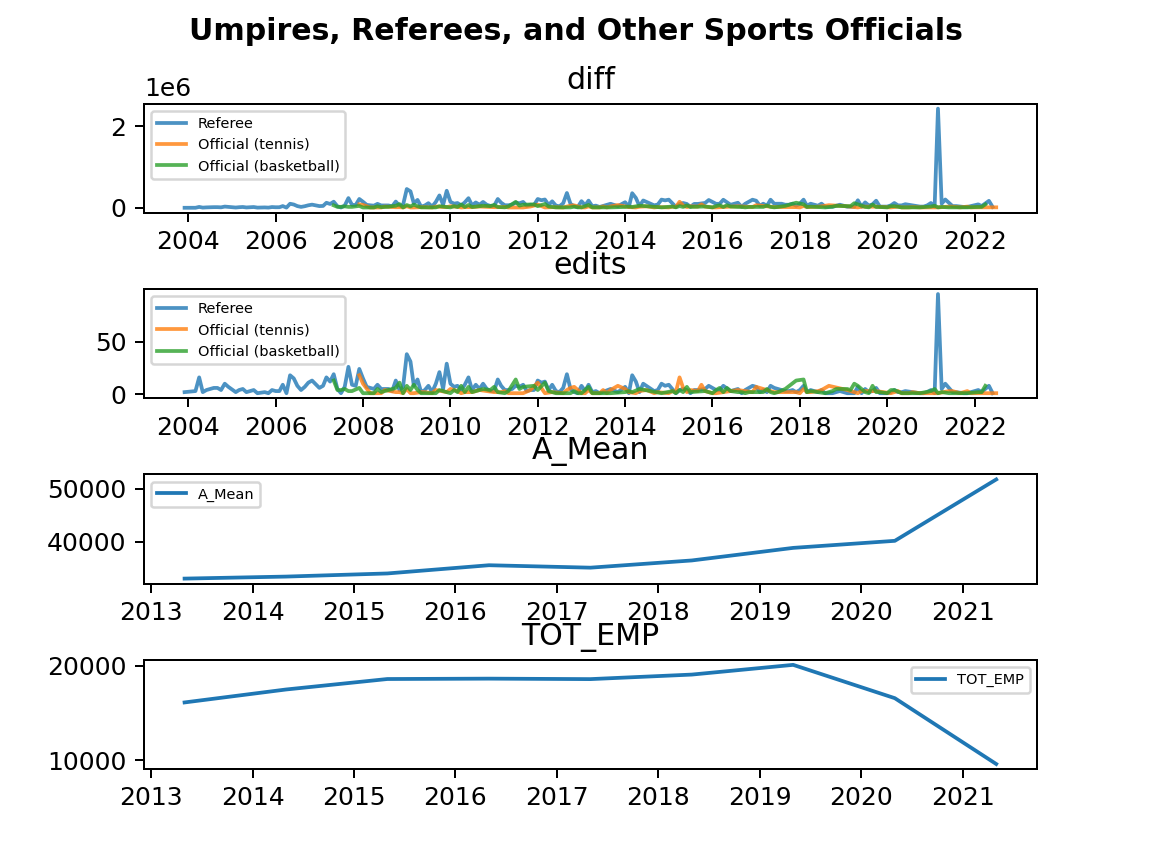

In [13]:
occ = Occupation(*occupations[30])
plot_page(occ)

In [14]:
page_name= "Referee"
spikes = [ (date, value) for date, value in occ.lenient_binned_edits[page_name].items() if value > 30]
binned_revisions = month_bin_revisions(occ.lenient_revisions)[page_name]
#edit_numbers = [ value for date, value in occ.lenient_binned_edits[page_name].items() if (date.year, date.month) != (2021, 3)]
edit_numbers = [ value for date, value in occ.lenient_binned_edits[page_name].items()]
print(median(edit_numbers))
print(mean(edit_numbers))
print(stdev(edit_numbers))

4.0
6.5353535353535355
8.479073231745446


In [15]:
for date, value in spikes:
    print(f"Spike at {date.year}-{date.month} with {value} edits")
    print("users ordered by contributions:")
    pprint(contributions_by_user(binned_revisions[date]))
    print("\n\n")

Spike at 2009-1 with 38 edits
users ordered by contributions:
[('C.Fred', 10),
 ('UnitarianUniversalism', 7),
 ('Alley6472222', 3),
 ('Timsdad', 2),
 ('74.250.23.199', 2),
 ('194.81.151.103', 2),
 ('209.181.89.170', 1),
 ('Zzyzx11', 1),
 ('Sturm55', 1),
 ('АлександрВв', 1),
 ('Ndenison', 1),
 ('92.3.238.75', 1),
 ('71.17.5.197', 1),
 ('SoxBot III', 1),
 ('92.2.196.189', 1),
 ('210.1.221.121', 1),
 ('92.4.29.70', 1),
 ('92.2.0.75', 1)]



Spike at 2009-2 with 31 edits
users ordered by contributions:
[('C.Fred', 11),
 ('212.219.114.3', 5),
 ('Umpy', 3),
 ('98.185.129.170', 2),
 ('McSly', 2),
 ('92.4.98.174', 2),
 ('92.4.78.210', 1),
 ('67.233.229.191', 1),
 ('92.3.58.133', 1),
 ('ClueBot', 1),
 ('92.4.29.70', 1),
 ('92.4.57.44', 1)]



Spike at 2021-3 with 95 edits
users ordered by contributions:
[('JorgeLaArdilla', 93), ('WikiCleanerBot', 1), ('Diannaa', 1)]





## Qualitative Exploration
The Spike with 95 edits again is down to JorgeLaArdilla adding a big amount of new content to the page. 

One interesting thing about this page is tough that besidest this extension these pages behave like we would expect pages about referees to behave (not change much)

lenient links:
[['Model (person)', 'http://en.wikipedia.org/?curid=48916']]




strict links:
[['Model (person)', 'http://en.wikipedia.org/?curid=48916']]


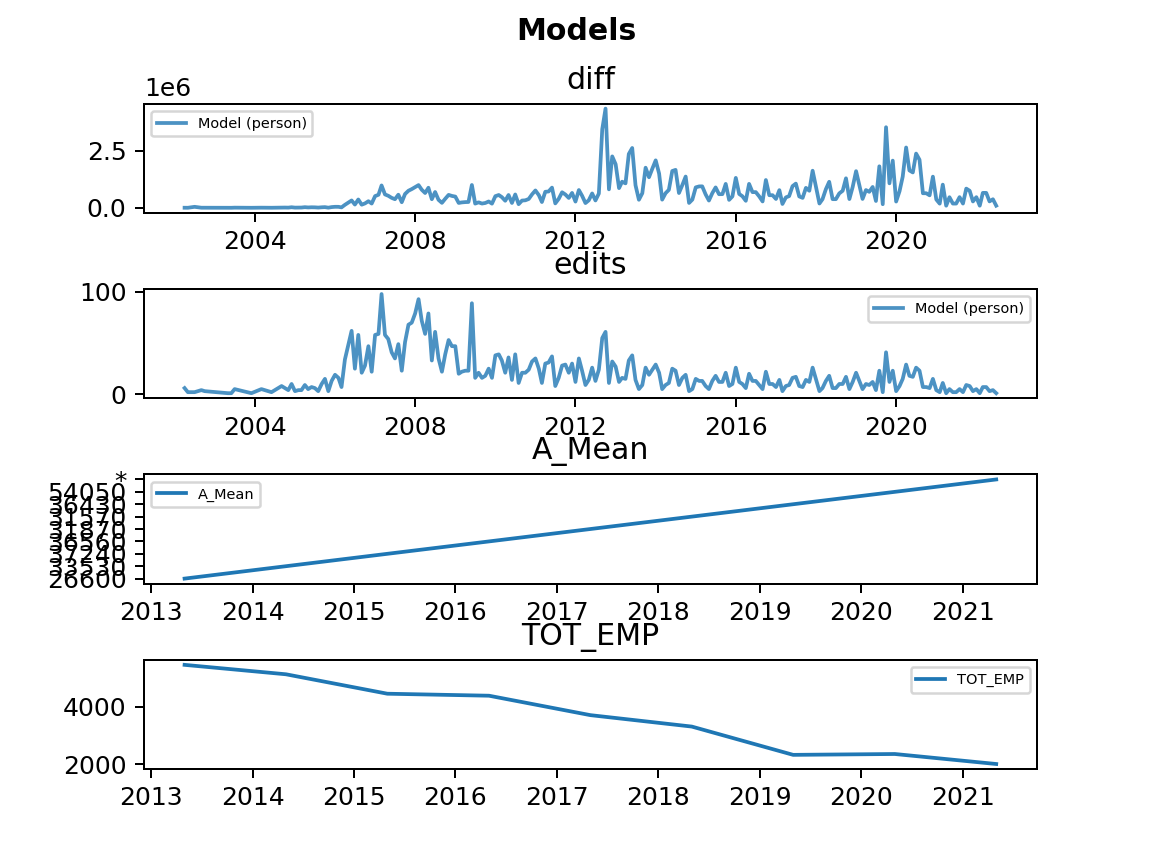

In [16]:
occ = Occupation(*occupations[66])
plot_page(occ)

## Initial Thoughts

Models seems like a much more healthy page, ie. the edits are distributed much more evenly and they follow a trend. It seems we see a spike after COVID (the first spike is to early 2019-10), but it seems none of the edits are really covid related (also no covid related changes in 2020-04). The COVID spike could also be due to people having more time to edit wikipedia pages because of COVID.

In [17]:
occ.A_MEAN

[26600, 33530, 37240, 36560, 31870, 31570, 36430, 54050, '*']

In [18]:
page_name= "Model (person)"
spikes = [ (date, value) for date, value in occ.lenient_binned_edits[page_name].items() if value > 24]
edit_numbers = [ value for value in occ.lenient_binned_edits[page_name].values()]
print(median(edit_numbers))
print(mean(edit_numbers))
print(stdev(edit_numbers))
spikes.sort(key = lambda x: x[0], reverse = True)
binned_revisions = month_bin_revisions(occ.lenient_revisions)[page_name]
for date, value in spikes:
    print(f"Spike at {date.year}-{date.month} with {value} edits")
    print("users ordered by contributions:")
    pprint(contributions_by_user(binned_revisions[date]))
    print("\n\n")

14
20.15111111111111
18.66897519738657
Spike at 2020-7 with 26 edits
users ordered by contributions:
[('Enthusiast01', 7),
 ('103.117.34.120', 3),
 ('GardenMan11', 2),
 ('Showercurtainrod', 2),
 ('MrOllie', 2),
 ('WilfredSwinton', 1),
 ('Visioncurve', 1),
 ('BD2412', 1),
 ('Bingobro', 1),
 ('Chaheel Riens', 1),
 ('2401:4900:46A8:845F:0:0:1037:C2D6', 1),
 ('2409:4072:785:907D:18CD:971A:D9B9:7796', 1),
 ('124.122.133.71', 1),
 ('2001:FB1:C5:48A9:C820:D078:1DCD:C65D', 1),
 ('Blablubbs', 1)]



Spike at 2020-4 with 29 edits
users ordered by contributions:
[('MrOllie', 4),
 ('Greyjoy', 2),
 ('Tholme', 2),
 ('Mirka Oktavia', 2),
 ('Thula134', 2),
 ('Praxidicae', 1),
 ('All hail Armok', 1),
 ('WikiCleanerBot', 1),
 ('198.52.95.144', 1),
 ('Brookebasile', 1),
 ('CLCStudent', 1),
 ('Thaisl55', 1),
 ('Chaheel Riens', 1),
 ('Masterchiefindia', 1),
 ('LizardJr8', 1),
 ('202.51.88.207', 1),
 ('190.58.17.38', 1),
 ('2601:CF:4500:1EB0:A89D:8F79:EEE4:8584', 1),
 ('Karrynwieda', 1),
 ('TheImaCow', 1),
